#### About Dataset
### The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML.

### The resources for this dataset can be found at https://www.openml.org/d/1597

### Author: Andrea Dal Pozzolo, Olivier Caelen and Gianluca Bontempi
### Source: Credit card fraud detection - Date 25th of June 2015
### Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

#### Importing all libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import warnings  #to hide all the warning in the notebook
warnings.filterwarnings('ignore')

#### Loading dataset

In [3]:
df = pd.read_csv (r'C:\DataScience\Project\credit_card_fraud_detection\creditcard_csv.csv')
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,'0'
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,'0'
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,'0'
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,'0'
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,'0'


### Due to confidentiality concerns the coloumns names are not given except Class, time and amount.Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### There is no null values 

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.Class.value_counts()

'0'    284315
'1'       492
Name: Class, dtype: int64

#### There are 492 frauds in all the data but the data type is not int

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class      object
dtype: object

#### Changing the datatype to int

In [8]:
df['Class'] = df['Class'].str.strip("'")
df['Class'] = df['Class'].astype(int)
df.Class

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int32

####  DATA VISUALISATION

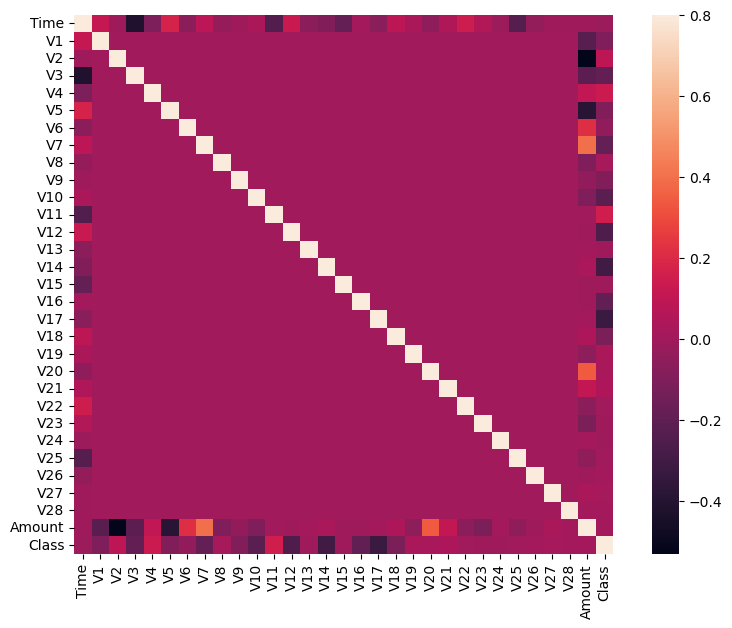

In [9]:
corrmat = df.corr()
fig = plt.figure(figsize = (10, 7))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

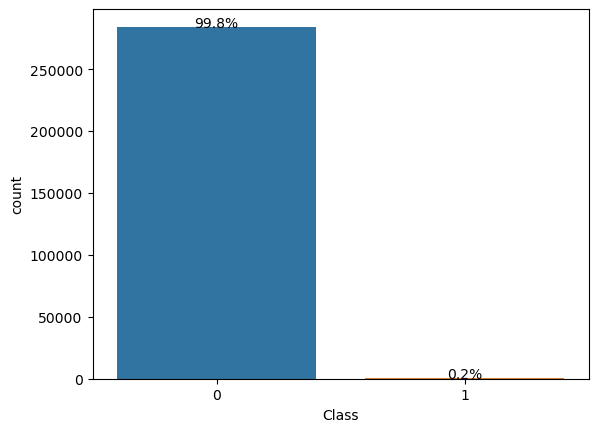

In [10]:
ax = sns.countplot(x='Class', data=df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

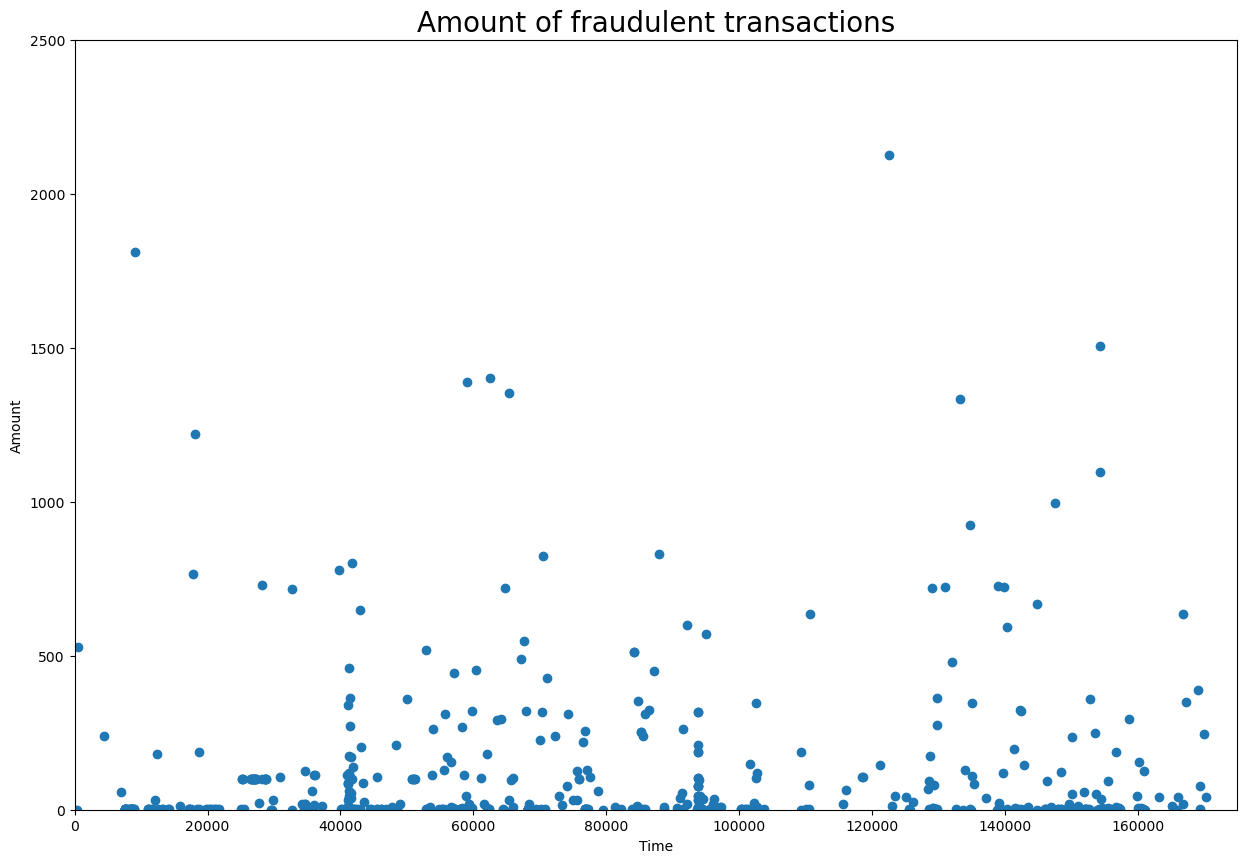

In [11]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Amount of fraudulent transactions',size=20)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [12]:
normal_transaction = df.loc[df['Class'] == 0]["Time"]
fraud_transaction = df.loc[df['Class'] == 1]["Time"]

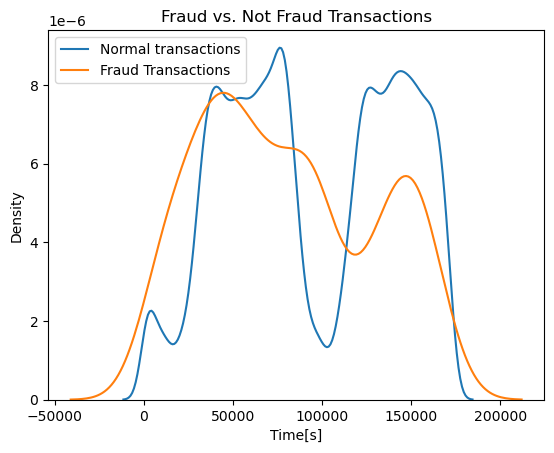

In [13]:
sns.kdeplot(data=normal_transaction, label="Normal transactions", shade=False)
sns.kdeplot(data=fraud_transaction, label="Fraud Transactions", shade=False)
plt.xlabel("Time[s]")
plt.ylabel("Density")
plt.title("Fraud vs. Not Fraud Transactions")

plt.legend()

plt.show()

#### As the data shows Only clustering and classifications algorithms work in this data set

#### Importing all ML classifiers

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [16]:

X = df.drop('Class', axis=1)
y = df.Class

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
models = {
    'Logistic Regression': LogisticRegression(),
    'xgb_classifier' : XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-NN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, verbose=0,loss_function='Logloss', random_seed=42),
    'SVM': SVC(),
    'Gradient Classifier' : GradientBoostingClassifier(random_state=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print('-' * 40)

Logistic Regression Metrics:
Accuracy: 1.00
Precision: 0.85
Recall: 0.60
F1-score: 0.70
----------------------------------------
xgb_classifier Metrics:
Accuracy: 1.00
Precision: 0.95
Recall: 0.78
F1-score: 0.85
----------------------------------------
Decision Tree Metrics:
Accuracy: 1.00
Precision: 0.72
Recall: 0.74
F1-score: 0.73
----------------------------------------
Random Forest Metrics:
Accuracy: 1.00
Precision: 0.94
Recall: 0.80
F1-score: 0.86
----------------------------------------
K-NN Metrics:
Accuracy: 1.00
Precision: 0.85
Recall: 0.76
F1-score: 0.80
----------------------------------------
CatBoost Metrics:
Accuracy: 1.00
Precision: 0.95
Recall: 0.80
F1-score: 0.87
----------------------------------------
SVM Metrics:
Accuracy: 1.00
Precision: 0.91
Recall: 0.61
F1-score: 0.73
----------------------------------------
Gradient Classifier Metrics:
Accuracy: 1.00
Precision: 0.52
Recall: 0.20
F1-score: 0.29
----------------------------------------


#### All the models shows good accuracy but gradient boost classifier shows less precision compared to others
#### Gradient Boosting Classifier is sensitive to outliers and noisy data, which might be the reason for less
#### precision compared to other models.
#### Also, Gradient Boosting Classifier is prone to overfitting, which might be another reason for 
#### less precision.



Learning rate set to 0.101784
0:	learn: 0.3591976	total: 24.3ms	remaining: 24.3s
1:	learn: 0.1832888	total: 47.9ms	remaining: 23.9s
2:	learn: 0.0993872	total: 76.5ms	remaining: 25.4s
3:	learn: 0.0554519	total: 104ms	remaining: 25.8s
4:	learn: 0.0325086	total: 128ms	remaining: 25.5s
5:	learn: 0.0203886	total: 152ms	remaining: 25.1s
6:	learn: 0.0137068	total: 176ms	remaining: 25s
7:	learn: 0.0098612	total: 202ms	remaining: 25s
8:	learn: 0.0075741	total: 229ms	remaining: 25.2s
9:	learn: 0.0060708	total: 256ms	remaining: 25.3s
10:	learn: 0.0051412	total: 281ms	remaining: 25.2s
11:	learn: 0.0044618	total: 305ms	remaining: 25.1s
12:	learn: 0.0040189	total: 331ms	remaining: 25.1s
13:	learn: 0.0036814	total: 357ms	remaining: 25.1s
14:	learn: 0.0034398	total: 382ms	remaining: 25.1s
15:	learn: 0.0032457	total: 407ms	remaining: 25s
16:	learn: 0.0030987	total: 433ms	remaining: 25.1s
17:	learn: 0.0029717	total: 463ms	remaining: 25.3s
18:	learn: 0.0028879	total: 488ms	remaining: 25.2s
19:	learn: 0.0

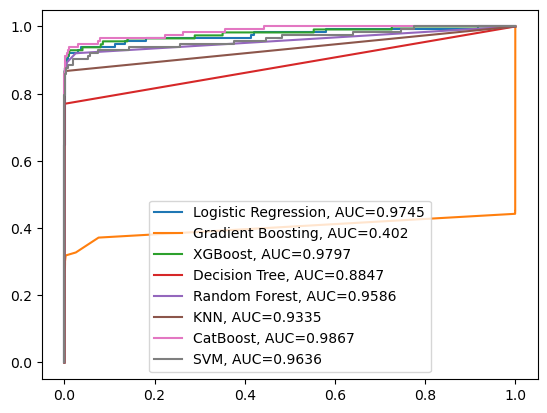

In [17]:
from sklearn import metrics
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = np.round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = np.round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#for xgboost
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = np.round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#for decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = np.round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

# for random forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = np.round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# for knn
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = np.round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#for catboost
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = np.round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="CatBoost, AUC="+str(auc))

#for svm
model = SVC(probability=True)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = np.round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))




#add legend
plt.legend()
plt.show()

#### As the AUC-ROC graph shows other than gradient boosting all the models performs very well 

## The models except gradientboost are succesfull and ready to use

